BCNN trial for the dataset: cats vs dogs from Kaggle:
4 libraries we need:
- Numpy
- Pandas; data processing
- Matplotlib; plot
- Tensorflow Keras Models 
- Tensorflow Keras layers
- Conv2D: basic convolution layer
- Dense: fully connected layer
- Maxpooling: pooling layer
- Flatten: flatten before we can input the data into the dense layer

In [36]:
# import the packages
import numpy as np 
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

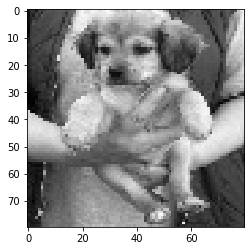

In [40]:
# import dataset cats vs dogs
import os
import cv2
import matplotlib.pyplot as plt 
DATADIR= "/Users/tasiabueno/Documents/Thesis/Data.trial/train" # Insert the directory of where the data-set is stored
path = os.path.join(DATADIR)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p), cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80,80))
    plt.imshow(new_img_array , cmap = "gray")
    break 



In [41]:
# create your output vector with 0 and 1 indicating wether its a dog or a cat
# the convert function maps category "dog=1" and "cat=0"
x = []
y = []
convert = lambda category: int(category == "dog") #Create anonymous function, function with nog names using the lambda function
def complete_train_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p), cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80,80))
        x.append(new_img_array)
        y.append(category)

In [42]:
# creat the complete data set
complete_train_data(path)

In [43]:
# Check 
import numpy as np 
x = np.array(x).reshape(-1,80,80,1)
y = np.array(y)
print(x)
print(y)


[[[[ 23]
   [ 45]
   [ 48]
   ...
   [155]
   [181]
   [189]]

  [[ 19]
   [ 42]
   [ 40]
   ...
   [158]
   [165]
   [187]]

  [[ 15]
   [ 42]
   [ 29]
   ...
   [143]
   [173]
   [192]]

  ...

  [[ 22]
   [ 25]
   [ 29]
   ...
   [ 56]
   [ 57]
   [ 59]]

  [[ 37]
   [ 23]
   [ 23]
   ...
   [ 47]
   [ 53]
   [ 59]]

  [[ 34]
   [ 29]
   [ 29]
   ...
   [ 54]
   [ 55]
   [ 52]]]


 [[[ 97]
   [102]
   [104]
   ...
   [124]
   [140]
   [104]]

  [[ 93]
   [102]
   [108]
   ...
   [125]
   [143]
   [105]]

  [[ 95]
   [ 98]
   [105]
   ...
   [121]
   [110]
   [101]]

  ...

  [[ 47]
   [ 55]
   [ 61]
   ...
   [ 87]
   [ 93]
   [ 98]]

  [[ 36]
   [ 49]
   [ 53]
   ...
   [ 41]
   [ 77]
   [ 81]]

  [[ 36]
   [ 41]
   [ 46]
   ...
   [ 70]
   [ 29]
   [ 44]]]


 [[[ 66]
   [122]
   [167]
   ...
   [123]
   [123]
   [108]]

  [[ 65]
   [ 98]
   [169]
   ...
   [131]
   [114]
   [111]]

  [[ 66]
   [ 77]
   [167]
   ...
   [132]
   [113]
   [114]]

  ...

  [[ 99]
   [ 88]
   [ 72]
   

In [44]:
# start to build a sequential model, a linear stack of layers
# afterward we add layers to it 
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = x.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='softmax'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [45]:
# run the model with the training data, 
# epoch; how many times our model with run through the complete data
# batch size; how much amount of data at once you wanna pass throught the model
# valdiation_split; how much of data you will ned to check the cross validaiton
model.fit(x,y, epochs = 10, batch_size=32, validation_split = 0.2)


Epoch 1/10
625/625 [==============================] - 89s 142ms/step - loss: 1.4206 - accuracy: 0.5810 - val_loss: 0.6765 - val_accuracy: 0.5810
Epoch 2/10
625/625 [==============================] - 90s 144ms/step - loss: 0.6328 - accuracy: 0.6481 - val_loss: 0.6392 - val_accuracy: 0.6482
Epoch 3/10
625/625 [==============================] - 90s 143ms/step - loss: 0.5787 - accuracy: 0.6985 - val_loss: 0.6256 - val_accuracy: 0.6784
Epoch 4/10
625/625 [==============================] - 90s 144ms/step - loss: 0.4918 - accuracy: 0.7620 - val_loss: 0.6289 - val_accuracy: 0.6892
Epoch 5/10
625/625 [==============================] - 90s 143ms/step - loss: 0.3819 - accuracy: 0.8246 - val_loss: 0.6949 - val_accuracy: 0.6780
Epoch 6/10
625/625 [==============================] - 90s 144ms/step - loss: 0.2671 - accuracy: 0.8832 - val_loss: 0.8803 - val_accuracy: 0.6802
Epoch 7/10
625/625 [==============================] - 90s 144ms/step - loss: 0.1748 - accuracy: 0.9294 - val_loss: 1.1840 - val_ac

In [52]:
train = "/Users/tasiabueno/Documents/Thesis/Data.trial/test"
path = os.path.join(train)

#os.listdir(path)

In [54]:
x_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        x_test.append(new_img_array)
create_test1_data(path)
x_test = np.array(x_test).reshape(-1,80,80,1)


In [60]:
predictions = model.predict(x_test)

In [61]:
predictions_val = [int(round(p[0])) for p in predictions]

In [64]:
submission_df = pd.DataFrame({"id":id_line, "label":predictions_val})
submission_df.to_csv("submission.csv", index=False)

In [65]:
print(submission_df)

         id  label
0      9733      0
1        63      1
2      6400      1
3       823      1
4      4217      0
...     ...    ...
12495  3561      0
12496  8434      1
12497  7707      0
12498  6419      0
12499  1376      1

[12500 rows x 2 columns]


In [66]:
print(predictions_val)

[0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 